In [7]:
# Block 1: Imports and Define Image Loading Function
import time
import os
from dotenv import load_dotenv
from PIL import Image  # For loading the image file
from google import genai # Using your confirmed working import
from google.genai import types # Using your confirmed working import
from IPython import display

# Load environment variables (e.g., for API_KEY)
load_dotenv()
print("Environment variables loaded (if .env file exists).")

def load_image(image_path):
    """Loads an image from the specified file path using PIL."""
    try:
        print(f"Loading image from: {image_path}")
        if not os.path.exists(image_path):
            print(f"Error: Image file not found at {image_path}")
            return None
        # Open the image using PIL
        image = Image.open(image_path)
        # Convert to RGB to ensure compatibility
        image = image.convert("RGB")
        print("Image loaded successfully.")
        return image
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

print("Image loading function defined.")

Environment variables loaded (if .env file exists).
Image loading function defined.


In [8]:
# Block 2: Define Video Generation Function using logic from your provided code
def generate_video_from_image_obj(client, image_filename, video_prompt):
    """
    Generates a video from a loaded PIL Image object using Veo,
    based on the user's provided working logic.

    Args:
        client: Google Generative AI client (instantiated via genai.Client).
        image_object: The loaded PIL Image object.
        video_prompt: Text prompt describing the desired video animation/content.

    Returns:
        List of filenames of saved videos (or None on error/no video).
    """


    saved_video_files = []
    print(f"Starting video generation with prompt: '{video_prompt}'")

    try:
        # Initialize operation for video generation using client.models... syntax
        operation = client.models.generate_videos(
            model="veo-2.0-generate-001", # Assuming model name is correct
            prompt=video_prompt,
            image=types.Image.from_file(location=image_filename), # Convert PIL Image to Image object
            config=types.GenerateVideosConfig(
                aspect_ratio="16:9", # Or derive from image aspect ratio if needed
                number_of_videos=1,
                duration_seconds=8,
                negative_prompt="zoom, zooming, dolly, dolly shot, push in, pull out, camera moving forward, camera moving backward, changing focal length, perspective shift, scale change, approaching, receding"
            ),
        )

        print("Video generation initiated. Waiting for completion...")

        # Use the exact polling loop from your code
        while not operation.done:
            print("Polling video status...")
            time.sleep(20)
            # Use the exact operation refresh method from your code
            operation = client.operations.get(operation) # Passing the operation object itself

        print("Video operation finished.")

        # Use the exact result processing and saving logic from your code
        # Ensure operation.result structure is correct
        if hasattr(operation, 'result') and hasattr(operation.result, 'generated_videos'):
            print(f"Processing {len(operation.result.generated_videos)} generated video(s)...")
            for n, generated_video in enumerate(operation.result.generated_videos):
                 # Ensure generated_video.video is the correct reference to the file object
                 if hasattr(generated_video, 'video'):
                     video_file_obj = generated_video.video
                     filename = f'generated_video_{n}_{int(time.time())}.mp4'

                     # Use exact download and save methods from your code
                     print(f"Downloading video {n}...")
                     client.files.download(file=video_file_obj) # Download step from your code

                     print(f"Saving video {n} as {filename}...")
                     video_file_obj.save(filename) # Save step from your code

                     saved_video_files.append(filename)
                     print(f"Successfully saved {filename}")
                 else:
                     print(f"Generated video result {n} lacks the 'video' attribute.")
        else:
             print("Operation result does not contain 'generated_videos'.")
             if hasattr(operation, 'result'): print("Full operation result:", operation.result)

    except Exception as e:
        print(f"An error occurred during video generation or processing: {e}")
        print("Response object: ", operation.result)
        import traceback
        traceback.print_exc()
        return None # Return None on error

    return saved_video_files if saved_video_files else None # Return list or None

print("Video generation function defined.")

Video generation function defined.


Google GenAI client instantiated successfully.
--------------------
Loading image from: generated_image.png
Image loaded successfully.
Source Image (preview):


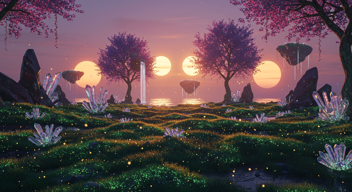

--------------------
Starting video generation with prompt: '
First, smoothly move the camera forward into the scene from the initial viewpoint for several seconds, as if walking towards the main subject or central area. Then, pause the forward motion completely and perform a smooth, continuous 180-degree horizontal rotation (yaw) to face the completely opposite direction. After the turn is complete, smoothly move the camera **backwards** for several seconds, effectively retreating towards the original starting point while maintaining the new facing direction.
'


In [ ]:
# Block 3: Execution - Load Image and Generate Video

# --- Configuration ---
INPUT_IMAGE_PATH = "generated_image.png"
VIDEO_PROMPT = """
This is **your** point of view, starting from the scene shown in the image. First, **you walk** smoothly forward into the scene for several seconds, moving towards the central area. Then, **you stop** walking and **turn completely around** (a full 180-degree horizontal turn) to face the opposite direction. Finally, **you walk backwards** smoothly for several seconds, retreating towards where you originally started while looking in this new direction. **Do not show any part of a person's body**; this video represents only the first-person viewpoint following these actions.
"""
# --- Initialize Client (Using exact syntax from your code) ---
client = None
api_key = os.getenv("OLD_GEMINI_API_KEY")
if not api_key:
    print("Error: API_KEY environment variable not set.")
else:
    try:
        # Use exact client initialization from your code
        client = genai.Client(api_key=api_key)
        print("Google GenAI client instantiated successfully.")
    except Exception as config_e:
        print(f"Error Instantiating GenAI client: {config_e}")
        client = None

# --- Main Execution Logic ---
if client:
    print("-" * 20)
    # 1. Load the image
    source_image = load_image(INPUT_IMAGE_PATH)

    if source_image:
        # Optionally display the source image
        try:
            print("Source Image (preview):")
            display.display(source_image.resize((source_image.width // 4, source_image.height // 4)))
        except Exception as display_err:
            print(f"(Could not display source image: {display_err})")

        print("-" * 20)
        # 2. Generate the video using the instantiated client
        start_time = time.time()
        generated_files = generate_video_from_image_obj(client, INPUT_IMAGE_PATH, VIDEO_PROMPT)
        end_time = time.time()

        print("-" * 20)
        if generated_files:
            print(f"Video generation successful! Files saved: {generated_files}")
            print(f"Time taken: {end_time - start_time:.2f} seconds.")
            # Optionally display the first generated video
            if generated_files:
                 try:
                     print("\nDisplaying first generated video:")
                     display.display(display.Video(generated_files[0], embed=True))
                 except Exception as video_display_err:
                     print(f"(Could not display video inline: {video_display_err})")
        else:
            print("Video generation failed or produced no output files.")
            print(f"Time taken: {end_time - start_time:.2f} seconds.")
    else:
        print("Could not load source image. Cannot generate video.")
elif not client:
     print("Cannot proceed without a configured GenAI client.")
else:
     print("Please update 'INPUT_IMAGE_PATH' in this block to your image file.")

print("\nScript finished.")